In [1]:
import sys
sys.path.append('../..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.neuralnetwork.autoencoder import Autoencoder

/home/daan/.anaconda3/envs/pacs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


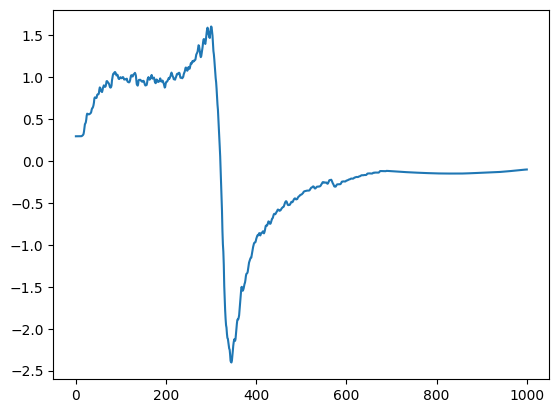

In [12]:
b = Autoencoder(model_name='test_gelu')
data = np.load('/home/daan/Projects/pacs/dataset/test_set.npz')['test_data'][0]
enc = b.encode(data)
plt.plot(enc[:,4])
plt.show()

In [3]:
a = Autoencoder(epochs=100)
a.get_data('dataset/test_set.npz', compressed_name='test_data')
a.build_model()
a.train_model()

100%|██████████| 100/100 [00:00<00:00, 1945.80it/s]


Epoch 1/100
2503/2503 [==============================] - 33s 12ms/step - loss: 0.0390 - mae: 0.1115 - val_loss: 0.0151 - val_mae: 0.0586
Epoch 2/100
2503/2503 [==============================] - 28s 11ms/step - loss: 0.0167 - mae: 0.0633 - val_loss: 0.0133 - val_mae: 0.0632
Epoch 3/100
2503/2503 [==============================] - 28s 11ms/step - loss: 0.0143 - mae: 0.0566 - val_loss: 0.0097 - val_mae: 0.0430
Epoch 4/100
2503/2503 [==============================] - 28s 11ms/step - loss: 0.0129 - mae: 0.0529 - val_loss: 0.0084 - val_mae: 0.0385
Epoch 5/100
2503/2503 [==============================] - 28s 11ms/step - loss: 0.0121 - mae: 0.0502 - val_loss: 0.0086 - val_mae: 0.0391
Epoch 6/100
2503/2503 [==============================] - 28s 11ms/step - loss: 0.0115 - mae: 0.0484 - val_loss: 0.0075 - val_mae: 0.0353
Epoch 7/100
2503/2503 [==============================] - 30s 12ms/step - loss: 0.0111 - mae: 0.0471 - val_loss: 0.0073 - val_mae: 0.0391
Epoch 8/100
2503/2503 [==================

KeyboardInterrupt: 

In [4]:
test = np.load('dataset/test_set.npz')['test_data'][0]
test.shape

(1001, 20, 20, 2)

In [5]:
encoded = a.encode(test)
encoded.shape

(1001, 10)

In [6]:
decoded = a.decode(encoded)
decoded.shape

(1001, 20, 20, 2)

In [8]:
a.save_model('test_gelu')

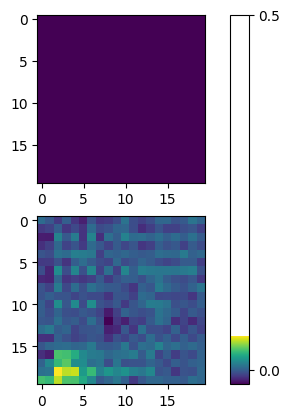

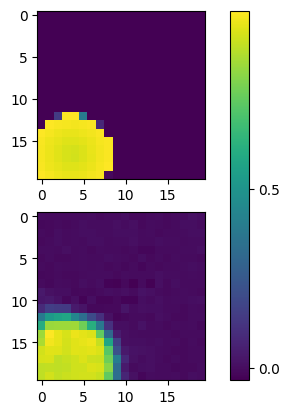

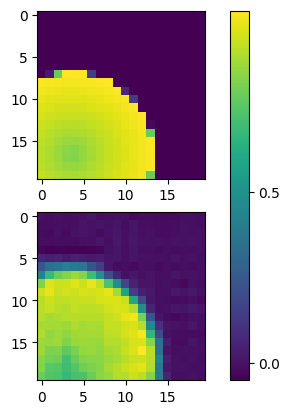

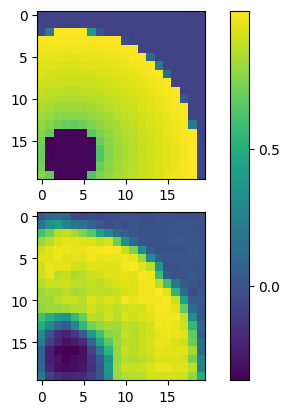

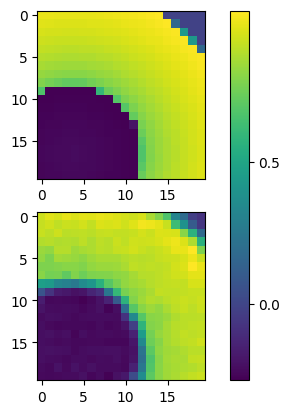

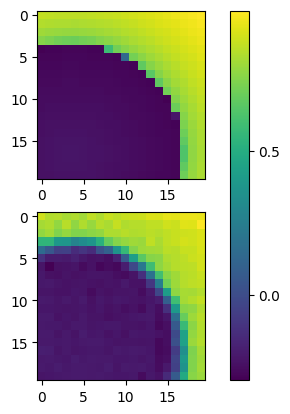

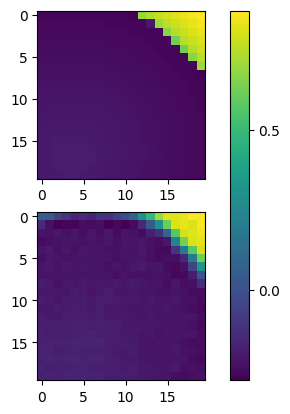

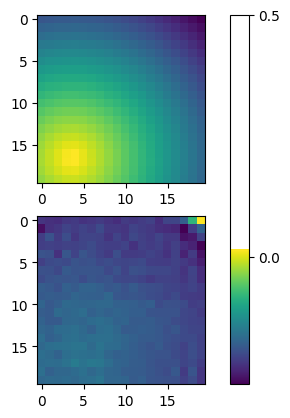

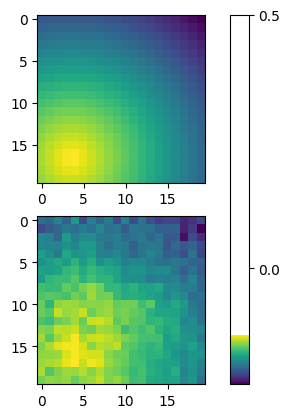

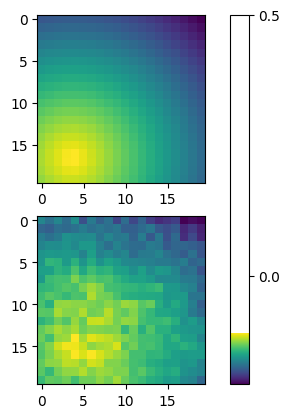

In [7]:


for i in [100*i for i in range(10)]:
    fig, ax = plt.subplots(2,1)
    ax[0].imshow(test[i,:,:,0])
    im = ax[1].imshow(decoded[i,:,:,0])
    cbar = fig.colorbar(im,ax=ax.ravel().tolist())
    cbar.set_ticks(np.arange(0,1,0.5))
    plt.show()
